#  `geopandas`

Geopandas is a ptython library that extends `pandas` by adding support for geospatial data
## Reporducible

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

to import data we first use the `os` package to make a reporducaible file path

In [2]:
fp = os.path.join('data','gbif_sus_scrofa_california','gbif_sus_scrofa_california.shp')
fp

'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

In [3]:
pigs = gpd.read_file(fp)
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [4]:
fp = os.path.join('data','ca_state_boundary','ca_state_boundary.shp')
ca_boundry = gpd.read_file(fp)
ca_boundry.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


In [5]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [6]:
# Check the data type of the pigs dataframe 
print(type(pigs))

# Check the data type of the geometry column
print(type(pigs.geometry))

# Check the data type of the gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [7]:
# Check the data type of each column
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [8]:
#check the type of each element in the geometry column using the geom_type attribute of a geopandas.GeoDataFrame:


pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

what is the geomerty type of the single feature in the CA state boundry

In [9]:
ca_boundry.geom_type

0    MultiPolygon
dtype: object

In [10]:
# Access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# Examine CRS details
print('Ellipsoid: ', pigs.crs.ellipsoid)
print('Datum: ', pigs.crs.datum)
print('Is geographic?: ', pigs.crs.is_geographic)
print('Is projected?: ', pigs.crs.is_projected)

Ellipsoid:  WGS 84
Datum:  World Geodetic System 1984 ensemble
Is geographic?:  True
Is projected?:  False


In [12]:
# Obtain the geographic extent of the geo-dataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [13]:
# Examine crs and extrent of CA boundary 
print("CRS:", ca_boundry.crs, '\n')
print(ca_boundry.total_bounds, '\n')


CRS: EPSG:4326 

[-124.48201686   32.52883674 -114.13122248   42.00950827] 



## Data Wrangling
you can use all your pansas data wrangoling to wrangle geopansas

In [14]:
# Examine pig observation by year
pigs['year'].value_counts().sort_index()

year
1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: count, Length: 61, dtype: int64

In [15]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs['year']>=2020]

# Check length of original dataframe
print('Total number of observations: ' , len(pigs))

# Check length of new dataframe
print('Number of observations since 2020: ' , len(pigs_recent))

Total number of observations:  1046
Number of observations since 2020:  606


# Create a map (preliminary)

gpd.geodataframe has a plot() method that quicky makes a plot for our data useng the geopsatial info

<Axes: >

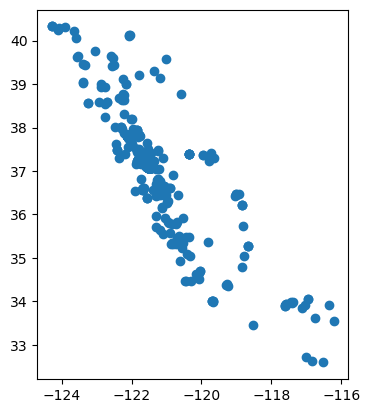

In [16]:
pigs_recent.plot()

## `matplotlib`
we can interact with plt via its `pyplot` interface
matplotlib graphs the data in a figure thart can have 1 or more axis. the axis is only the aereas specified by the x axis and the y axis and what is plotted in it. A figure can include multiple axis innit

to create a blank figure: 

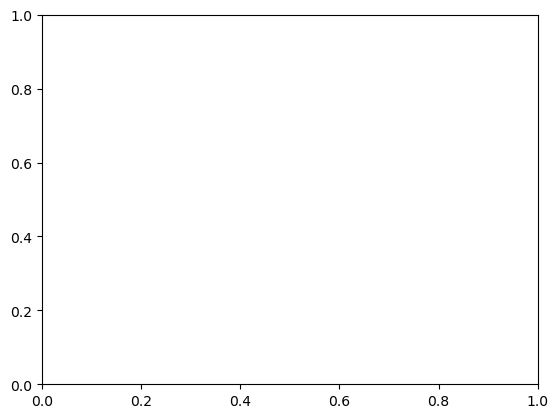

In [ ]:
#initilize a emoty figure and axis
fig, ax = plt.subplots() # returns 2 onjects fig and axes
#display fig
plt.show()

### Adding layere
when using. plt it can be usful to think of creating a pot asnadding layers on an axis
EX:
the first layer we want to ass to out axis is the pigs recent poijnt data

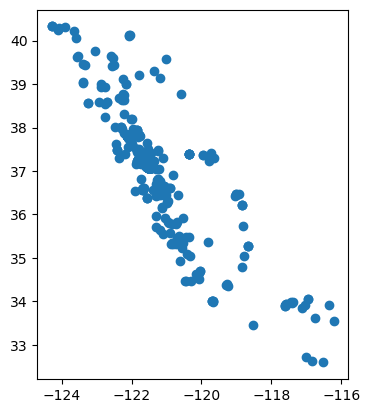

In [18]:
# Initialize empty figure
fig, ax = plt.subplots()

# Add data to axis
pigs_recent.plot(ax=ax)

# Display figure
plt.show()

## customzation 
some can be done directly in plot method for the data frame some other is done by upating atributes of the axis 
ex:


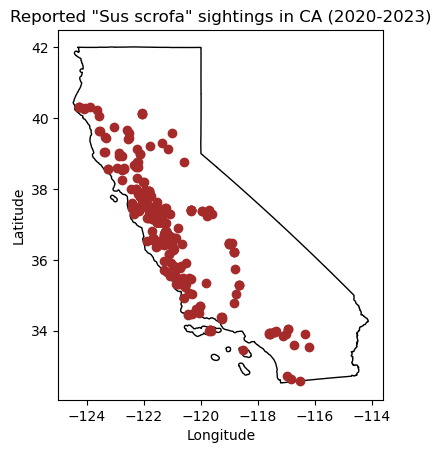

In [40]:
# Initialize empty figure
fig, ax = plt.subplots()

ca_boundry.plot(ax = ax,
                alpha = 1,
                color = "none",
                edgecolor = "black")

# Add data to axis
pigs_recent.plot(ax=ax,         # Add plot to axis
                     # Adjust transparency
                 color='brown'  # Update point color
                 )


# Update axis 
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Display figure
plt.show()